In [1]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
import re
import matplotlib.pyplot as plt

### Gathering data

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# Programmatical download for image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
image_p = pd.read_csv('image-predictions.tsv', sep='\t')
image_p.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = image_p.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Fail
2: 666029285002620928
Fail
3: 666033412701032449
Fail
4: 666044226329800704
Fail
5: 666049248165822465
Fail
6: 666050758794694657
Fail
7: 666051853826850816
Fail
8: 666055525042405380
Fail
9: 666057090499244032
Fail
10: 666058600524156928
Fail
11: 666063827256086533
Fail
12: 666071193221509120
Fail
13: 666073100786774016
Fail
14: 666082916733198337
Fail
15: 666094000022159362
Fail
16: 666099513787052032
Fail
17: 666102155909144576
Fail
18: 666104133288665088
Fail
19: 666268910803644416
Fail
20: 666273097616637952
Fail
21: 666287406224695296
Fail
22: 666293911632134144
Fail
23: 666337882303524864
Fail
24: 666345417576210432
Fail
25: 666353288456101888
Fail
26: 666362758909284353
Fail
27: 666373753744588802
Fail
28: 666396247373291520
Fail
29: 666407126856765440
Fail
30: 666411507551481857
Fail
31: 666418789513326592
Fail
32: 666421158376562688
Fail
33: 666428276349472768
Fail
34: 666430724426358785
Fail
35: 666435652385423360
Fail
36: 666437273139982337
Fail
3

In [6]:
# Get JSON data from Twitter API.
elements = ['id', 'favorite_count', 'retweet_count']

# Create a dictionary.
dict_ = []
with open('tweet-json.txt', 'r') as r: 
    json_data = r.readline()
    while json_data:
        dictionnary = json.loads(json_data)
        data_row = dict((i, dictionnary[i]) for i in elements)
        dict_.append(data_row)
        json_data = r.readline()

In [7]:
# Create interactions DataFrame   
interactions = pd.DataFrame.from_dict(dict_)
interactions.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


### Assessing data

### Assessing twitter_archive

In [8]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
# tweet_id should be a string, not an int.
# time stamp should be a date type.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Check for any duplicate tweet_id
twitter_archive.tweet_id.duplicated().any()

False

In [11]:
# Check doggo, floofer, pupper and puppo.
# doggo, floofer, pupper and puppo should be in one column,
# called dog stage.
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
981,749417653287129088,NaN,NaN,2016-07-03 01:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's the most unphotogenic puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749417653...,11,10,Finn,None,None,pupper,None
2155,669603084620980224,NaN,NaN,2015-11-25 19:46:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,10,10,None,None,None,None,None
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,None,None,None,None


In [12]:
# There are names that have no sense, like 'a'.
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Maya          1
Jangle        1
Lacy          1
Dixie         1
Pupcasso      1
Name: name, Length: 957, dtype: int64

In [13]:
# Name "a" is an error made from the data extraction process
# from column text. The names have been extracted after
# 'This is' and 'Here is' in the text column.
pd.set_option('display.max_colwidth', -1)
twitter_arch_name_a = twitter_archive[twitter_archive['name'] == 'a'].loc[:,['text']]
twitter_arch_name_a 

,text
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
1207,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu


In [14]:
# Check if there are errors in other columns like ratings 
# (which has also been extracted from text)
twitter_archive['rating_numerator'].min()

0

In [15]:
# The minimum value makes sense as a rating numerator.
twitter_archive[twitter_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [16]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
# There is a 25% that has numerators between 13 and 1776.
# Let's see if this is an error.
twitter_archive[twitter_archive['rating_numerator'] >  12]['rating_numerator'].value_counts()

13      351
14      54 
75      2  
15      2  
420     2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
960     1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
666     1  
165     1  
182     1  
204     1  
1776    1  
80      1  
Name: rating_numerator, dtype: int64

In [18]:
# Which text have the highest numerators?
# Check if the numerators make sense.
twitter_archive[twitter_archive['rating_numerator'] > 400][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


In [19]:
# Check what happens with the denominator.
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [20]:
# Which text have the highest denominators? Checking they make sense.
# Here we found a text with 2 ratios where the rating chosen isn't the
# correct one. Now I'll have to check if there are more of these double
# ratios errors.
twitter_archive[twitter_archive['rating_denominator'] > 30][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


In [21]:
# See what happens with rows with no image urls.
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['tweet_id','text','rating_numerator','rating_denominator','expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]

,tweet_id,text,rating_numerator,rating_denominator,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,12,10,NaN,8.862664e+17,2.281182e+09,NaN,NaN,NaN
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10,NaN,8.816070e+17,4.738443e+07,NaN,NaN,NaN
64,879674319642796034,@RealKentMurphy 14/10 confirmed,14,10,NaN,8.795538e+17,3.105441e+09,NaN,NaN,NaN
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,10,10,NaN,8.707262e+17,1.648776e+07,NaN,NaN,NaN
148,863427515083354112,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",12,10,NaN,8.634256e+17,7.759620e+07,NaN,NaN,NaN
179,857214891891077121,@Marc_IRL pixelated af 12/10,12,10,NaN,8.571567e+17,1.806710e+08,NaN,NaN,NaN
185,856330835276025856,RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,14,10,NaN,NaN,NaN,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000
186,856288084350160898,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,14,10,NaN,8.562860e+17,2.792810e+08,NaN,NaN,NaN
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,NaN,8.558616e+17,1.943518e+08,NaN,NaN,NaN
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,NaN,8.558585e+17,1.361572e+07,NaN,NaN,NaN


In [22]:
# See replys that have image urls and ratings.
twitter_archive_notnull_expanded_urls = twitter_archive[twitter_archive['expanded_urls'].notnull()]
twitter_archive_notnull_expanded_urls_with_notnull_in_replay_to = twitter_archive_notnull_expanded_urls[twitter_archive_notnull_expanded_urls['in_reply_to_status_id'].notnull()].loc[:,['tweet_id','text','rating_numerator','rating_denominator','expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]
twitter_archive_notnull_expanded_urls_with_notnull_in_replay_to


,tweet_id,text,rating_numerator,rating_denominator,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
149,863079547188785154,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",14,10,https://twitter.com/dog_rates/status/863079547188785154/photo/1,6.671522e+17,4.196984e+09,NaN,NaN,NaN
184,856526610513747968,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",14,10,https://twitter.com/dog_rates/status/856526610513747968/photo/1,8.558181e+17,4.196984e+09,NaN,NaN,NaN
251,844979544864018432,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",13,10,"https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",7.590995e+17,4.196984e+09,NaN,NaN,NaN
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,https://twitter.com/dog_rates/status/802265048156610565/photo/1,7.331095e+17,4.196984e+09,NaN,NaN,NaN
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10,https://twitter.com/dog_rates/status/746906459439529985/photo/1,7.468859e+17,4.196984e+09,NaN,NaN,NaN
1018,746818907684614144,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,13,10,https://twitter.com/dog_rates/status/746818907684614144/photo/1,6.914169e+17,4.196984e+09,NaN,NaN,NaN
1127,729838605770891264,"""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",12,10,https://twitter.com/dog_rates/status/729838605770891264/video/1,7.291135e+17,4.196984e+09,NaN,NaN,NaN
1330,705786532653883392,"Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",11,10,https://twitter.com/dog_rates/status/705786532653883392/photo/1,7.032559e+17,4.196984e+09,NaN,NaN,NaN
1339,704871453724954624,I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,12,10,https://twitter.com/dog_rates/status/704871453724954624/photo/1,6.671522e+17,4.196984e+09,NaN,NaN,NaN
1356,703425003149250560,"Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC",9,10,https://twitter.com/dog_rates/status/703425003149250560/photo/1,7.030419e+17,4.196984e+09,NaN,NaN,NaN


In [23]:
# See what rows with null image urls look like.
# These rows with no image urls only give me info about how users behave
# in twitter: dates, device and interactions.
# With this information I see 2 ways of analyzing data: 
# 1) analyzing data about dogs: ratings, stage, names, predictions, breeds, 
# dog or not a doog.
# 2) analyzing how this account behaves: posting dates, device used, 
# interactions- replys and retweets.
twitter_archive_null_expanded_urls = twitter_archive[twitter_archive['expanded_urls'].isnull()]
twitter_archive_null_expanded_urls

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [24]:
# How many rows with null images are.
len(twitter_archive[twitter_archive['expanded_urls'].isnull()])

59

In [25]:
# See rows with no image url and no replys.
twitter_archive[twitter_archive['expanded_urls'].isnull()][twitter_archive['in_reply_to_status_id'].isnull()]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [26]:
# Check if these rows are retweets.
twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

In [27]:
# See if retweet texts are the same as retweeted_status_id not null rows.
twitter_archive[twitter_archive['text'].str.startswith('RT @')]['tweet_id'].count()

181

In [28]:
# Checking RT texts and retweeted_status_id not null rows have the same
# tweet_ids.
rt_retweeted_status = twitter_archive[twitter_archive['retweeted_status_id'].notnull()]
rt_text= twitter_archive[twitter_archive['text'].str.startswith('RT @')]
pd.merge(rt_retweeted_status, rt_text, on=['tweet_id'])

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp_x,source_x,text_x,retweeted_status_id_x,retweeted_status_user_id_x,retweeted_status_timestamp_x,expanded_urls_x,...,retweeted_status_user_id_y,retweeted_status_timestamp_y,expanded_urls_y,rating_numerator_y,rating_denominator_y,name_y,doggo_y,floofer_y,pupper_y,puppo_y
0,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",...,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
1,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",...,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
2,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",...,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
3,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",...,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
4,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",...,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,N

In [29]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [30]:
# Checking there are only nulls in retweeted_status_id, 
# retweeted_status_user_id and retweeted_status_timestamp columns.
# They should be removed
(twitter_archive[twitter_archive['retweeted_status_id'].notnull()].sum().any(),
twitter_archive[twitter_archive['retweeted_status_user_id'].notnull()].sum().any(),
twitter_archive[twitter_archive['retweeted_status_timestamp'].notnull()].sum().any())

(-841094628243881820, -841094628243881820, -841094628243881820)

In [31]:
# Cheking what is in the not nulls in_reply_to_status_id and 
# in_reply_to_user_id. It is only wrong content. 
# Can't not know anything from those integers that should be strings. 
# Should be removed.
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


##### Quality issues (twitter_archive)
- tweet_id should be a str, instead of an int.
- timestamp should be a datetime datatype and should be split into date and time.
- names 'a' are an error when extracting data. It seems they extracted the data after "This is ...","Here is...".
- There is more than one ratio per text in some tweet texts. 
- Columns in_reply_to_status_id, in_reply_to_user_id, have wrong content. Can't not know anything from those integers that should be strings.
- Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, don't have any content.

##### Tidiness issues (twitter_archive)
- doggo, floofer, pupper and puppo should be in the same column.
- Retweets and tweets without photos haven't got any relevant information.

### Assessing image_predictions

In [32]:
image_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_p.shape

(2075, 12)

In [34]:
image_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# How reliable are algorithms to make the prediction.
# The top prediction has a mean of almost 60%, while the other two 
# predictions have means around 13 and 6%.
image_p.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
# Cheking the second prediction probability is always smaller 
# than the top prediction probability.
image_p[image_p['p2_conf'] > image_p['p1_conf']].any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [48]:
# Top Breed predictions.
image_p['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
grey_fox              1  
hammer                1  
bearskin              1  
beaver                1  
cheeseburger          1  
Name: p1, Length: 378, dtype: int64

In [49]:
# Second position Breed predictions
image_p['p2'].value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
water_buffalo         1  
shopping_cart         1  
birdhouse             1  
basketball            1  
hair_spray            1  
Name: p2, Length: 405, dtype: int64

In [50]:
# Third position Breed predictions
image_p['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bell_cote             1 
hare                  1 
grand_piano           1 
triceratops           1 
screw                 1 
Name: p3, Length: 408, dtype: int64

##### Quality issues (image_p)
- tweet_id should be a str, instead of an int.
- Bad names for columns related with predictions (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog).
##### Tidiness issues (image_p)
- twitter_archive and image_p should be in one table.

### Assessing Interactions

In [51]:
interactions.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [52]:
# It must be a famous account because the means for favs and RT are high.
interactions.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [53]:
interactions.shape

(2354, 3)

### Cleaning

In [54]:
# Make a copy of all the dataframes to start cleaning.
twitter_archive_clean = twitter_archive.copy()
image_p_clean = image_p.copy()
interactions_clean = interactions.copy()

### Cleaning twitter_archive

#### tweet_id should be a str, not an int in twitter_archive

###### - Define

Change tweet_id datatype. It should be a string, not an int.

###### - Code

In [97]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

###### - Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### timestamp should be a datetime datatype and should be split into date and time.

###### - Define

Change timestamp datatype to datetime in twitter_archive and split it into date and time columns.

###### - Code

In [57]:
twitter_archive_clean['timestamp'] = pd.DatetimeIndex(twitter_archive_clean['timestamp'])

###### - Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [59]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [60]:
# Split datetime into date and time columns
twitter_archive_clean['date'] = pd.DatetimeIndex(twitter_archive_clean['timestamp']).date
twitter_archive_clean['time'] = pd.DatetimeIndex(twitter_archive_clean['timestamp']).time

In [61]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

###### - Test

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null object
time                          2

In [63]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1824,676496375194980353,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Griffin. He's upset because his costume for Halloween didn't arrive until today. 9/10 cheer up pup https://t.co/eoBCjSFajX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375194980353/photo/1,9,10,Griffin,None,None,None,None,2015-12-14,20:17:59
1256,710588934686908417,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1",12,10,Beemo,None,None,None,None,2016-03-17,22:09:38
1866,675349384339542016,6.749998e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Yea I lied. Here's more. All 13/10 https://t.co/ZQZf2U4xCP,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1,https://twitter.com/dog_rates/status/675349384339542016/photo/1",13,10,None,None,None,None,None,2015-12-11,16:20:15


#### names 'a' are incorrect. It's an error from extracting data (it seems the data that is extracted is after "This is" and "Here is"). They should be changed to None.

###### - Define

Replace name 'a' with None in twitter_archive.

###### - Code

In [64]:
twitter_archive_clean['name'].replace({'a': None}, inplace=True)

###### - Test

In [65]:
twitter_archive_clean[twitter_archive_clean['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


#### doggo, floofer, pupper and puppo should be in the same column. 

###### - Define

Combine dog stages columns (doggo,floofer,pupper and puppo) to one column.

###### - Code

In [66]:
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [67]:
twitter_archive_clean['dog_stage'] = (twitter_archive_clean['doggo'] +
                                  twitter_archive_clean['floofer'] +
                                  twitter_archive_clean['pupper'] +
                                  twitter_archive_clean['puppo'])

In [68]:
twitter_archive_clean['dog_stage'].replace('', 'None', inplace=True)

In [69]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

###### - Test

In [70]:
# There are 14 dog_stages with two different stages.
twitter_archive_clean['dog_stage'].value_counts()

None            1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

#### There are more than one ratio per text in some tweet texts. 

###### - Define

Drop the rows that have more than one rating in text. We can't assure which one is the correct rating.

###### - Code

In [71]:
# Function to extract all ratios in text.
def extract_ratios(twitter_archive_clean):
    ratios = re.findall(r'\d+/\d+', twitter_archive_clean['text'])
    return ratios

# Apply Function to new column all_ratios in DataFrame
twitter_archive_clean['all_ratios'] = twitter_archive_clean.apply(extract_ratios, axis=1)

# Check if we have double ratios in the texts.
twitter_archive_clean['all_ratios'].value_counts()

[12/10]            556
[11/10]            460
[10/10]            449
[13/10]            351
[9/10]             155
                  ... 
[7/11, 10/10]      1  
[7/10, 8/10]       1  
[121/110]          1  
[960/00, 13/10]    1  
[80/80]            1  
Name: all_ratios, Length: 65, dtype: int64

In [72]:
# Function to see which rows have double ratios in their texts.
def find_double_ratios(twitter_archive_clean):
    double = len(twitter_archive_clean['all_ratios']) > 1
    return double
# Apply Function to new column dobule_ratios in DataFrame
twitter_archive_clean['double_ratios'] = twitter_archive_clean.apply(find_double_ratios, axis=1)

In [73]:
# Drop rows with double_ratios because we don't know which ratio is 
# the correct one.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['double_ratios'] == False]

In [74]:
# Drop columns all_ratios and double_ratios
twitter_archive_clean = twitter_archive_clean.drop(['all_ratios','double_ratios'], axis=1)

###### - Test

In [75]:
# Check rows with double ratios are removed and all_ratios and 
# double_ratios have been removed. 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2323 non-null object
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
source                        2323 non-null object
text                          2323 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2267 non-null object
rating_numerator              2323 non-null int64
rating_denominator            2323 non-null int64
name                          2268 non-null object
date                          2323 non-null object
time                          2323 non-null object
dog_stage                     2323 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 290.4+ KB


#### Retweets and tweets without photos haven't got any relevant information.

###### - Define

Remove retweets and rows without dog photos in DataFrame.

###### - Code

In [76]:
# In case I want to analyze all the ratings, dates and sources,
# I keep the retweets and rows without expanded_urls in this DataFrame.
twitter_archive_clean_with_rt_and_nourls = twitter_archive_clean.copy()

In [77]:
# Remove rows that are retweets.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [78]:
# Remove rows without expanded_urls, dog photos.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

In [79]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017-08-01,16:23:56,None


###### - Test

In [80]:
# There are no null dog photos.
twitter_archive_clean['expanded_urls'].isnull().any()

False

In [81]:
# There are no retweets.
twitter_archive_clean['retweeted_status_id'].notnull().any()

False

#### Columns in_reply_to_status_id, in_reply_to_user_id, have wrong content. Can't not know anything from those integers that should be strings. Should be removed.
#### Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, don't have any content. Should be removed.

###### - Define

Remove irrelevant columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

###### - Code

In [82]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017-08-01,16:23:56,None


In [83]:
twitter_archive_clean = twitter_archive_clean[['tweet_id','date','time','text','name','rating_numerator','rating_denominator','dog_stage','expanded_urls','source']]

###### - Test

In [84]:
pd.Series(list(twitter_archive_clean))

0    tweet_id          
1    date              
2    time              
3    text              
4    name              
5    rating_numerator  
6    rating_denominator
7    dog_stage         
8    expanded_urls     
9    source            
dtype: object

### Cleaning image_p

#### Erroneous datatype for tweet_id in image_p

###### - Define

Change tweet_id datatype in image_p. It should be a string, not an int.

###### - Code

In [98]:
image_p_clean['tweet_id'] = image_p_clean['tweet_id'].astype('str')

###### - Test

In [86]:
image_p_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Prediction columns haven't got a descriptive name.

###### - Define

Change p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog column names for more descritpive ones.

###### - Code

In [87]:
image_p_clean = image_p_clean.rename(columns={'jpg_url': 'image_url',
                                              'img_num': 'images_n',
                                              'p1': 'top_breed_pred',
                                              'p1_conf': 'prob_1st_pred',
                                              'p1_dog': 'is_a_dog_1',
                                              'p2': '2nd_breed_pred',
                                              'p2_conf': 'prob_2nd_pred',
                                              'p2_dog' : 'is_a_dog_2',
                                              'p3': '3rd_breed_pred',
                                              'p3_conf': 'prob_3rd_pred',
                                              'p3_dog': 'is_a_dog_3'
                                             })

###### - Test

In [88]:
image_p_clean.head(1)

,tweet_id,image_url,images_n,top_breed_pred,prob_1st_pred,is_a_dog_1,2nd_breed_pred,prob_2nd_pred,is_a_dog_2,3rd_breed_pred,prob_3rd_pred,is_a_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Cleaning interactions

#### id should be a str, not an int in interactions

###### - Define

Change id datatype. It should be a string, not an int.

###### - Code

In [112]:
interactions_clean['id'] = interactions_clean['id'].astype('str')

###### - Test

In [113]:
interactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### twitter_archive and interactions should be in one table

###### - Define

Merge twitter_archive_clean, image_p_clean and interactions_clean in one table.

###### - Code

In [91]:
# Save all cleaned DataFrames for future reference before merging.
twitter_archive_clean.to_csv('twitter_archive_clean.csv')
image_p_clean.to_csv('image_p_clean.csv')
interactions_clean.to_csv('interactions_clean.csv')

In [309]:
# First merge: twitter_archive_clean and interactions_clean
df = pd.merge(twitter_archive_clean, interactions_clean, how='inner', left_on=['tweet_id'], right_on=['id'])

In [310]:
# Second merge: df and image_p_clean
df = pd.merge(df, image_p_clean, how='inner', on=['tweet_id'])

###### - Test

In [312]:
pd.Series(list(df))

0     tweet_id          
1     date              
2     time              
3     text              
4     name              
5     rating_numerator  
6     rating_denominator
7     dog_stage         
8     expanded_urls     
9     source            
10    id                
11    favorite_count    
12    retweet_count     
13    image_url         
14    images_n          
15    top_breed_pred    
16    prob_1st_pred     
17    is_a_dog_1        
18    2nd_breed_pred    
19    prob_2nd_pred     
20    is_a_dog_2        
21    3rd_breed_pred    
22    prob_3rd_pred     
23    is_a_dog_3        
dtype: object

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 24 columns):
tweet_id              1967 non-null object
date                  1967 non-null object
time                  1967 non-null object
text                  1967 non-null object
name                  1912 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
dog_stage             1967 non-null object
expanded_urls         1967 non-null object
source                1967 non-null object
id                    1967 non-null object
favorite_count        1967 non-null int64
retweet_count         1967 non-null int64
image_url             1967 non-null object
images_n              1967 non-null int64
top_breed_pred        1967 non-null object
prob_1st_pred         1967 non-null float64
is_a_dog_1            1967 non-null bool
2nd_breed_pred        1967 non-null object
prob_2nd_pred         1967 non-null float64
is_a_dog_2            1967 non-null bo

In [314]:
df.head(5)

,tweet_id,date,time,text,name,rating_numerator,rating_denominator,dog_stage,expanded_urls,source,...,images_n,top_breed_pred,prob_1st_pred,is_a_dog_1,2nd_breed_pred,prob_2nd_pred,is_a_dog_2,3rd_breed_pred,prob_3rd_pred,is_a_dog_3
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13,10,None,https://twitter.com/dog_rates/status/892420643555336193/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,None,https://twitter.com/dog_rates/status/892177421306343426/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,None,https://twitter.com/dog_rates/status/891815181378084864/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,None,https://twitter.com/dog_rates/status/891689557279858688/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29,16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,None,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [315]:
df.shape

(1967, 24)

In [316]:
### Store df
df.to_csv('twitter_archive_master.csv')

### Analyzing data

In [317]:
df.sample(5)

,tweet_id,date,time,text,name,rating_numerator,rating_denominator,dog_stage,expanded_urls,source,...,images_n,top_breed_pred,prob_1st_pred,is_a_dog_1,2nd_breed_pred,prob_2nd_pred,is_a_dog_2,3rd_breed_pred,prob_3rd_pred,is_a_dog_3
1869,667806454573760512,2015-11-20,20:47:20,This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,Filup,10,10,None,https://twitter.com/dog_rates/status/667806454573760512/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
472,792913359805018113,2016-10-31,02:17:31,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,None,13,10,None,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
364,813217897535406080,2016-12-26,03:00:30,Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81,Atlas,13,10,None,"https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West_Highland_white_terrier,0.035667,True
640,761227390836215808,2016-08-04,15:48:47,This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t.co/nhLX27WsDY,Albert,10,10,None,https://twitter.com/dog_rates/status/761227390836215808/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
552,778039087836069888,2016-09-20,01:12:28,Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff https://t.co/t8Y4x9DmVD,None,12,10,pupper,"https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.com/dog_rates/status/778039087836069888/photo/1","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True


#### Confirmation that the first prediction is the most reliable, with the highest percentage, with a great difference with respect to the other two predictions.

In [890]:
image_p_clean.prob_1st_pred.mean(), image_p_clean.prob_2nd_pred.mean(), image_p_clean.prob_3rd_pred.mean()

(0.5945482636144582, 0.13458860950039184, 0.06032416861810645)

#### How many images are there per text?

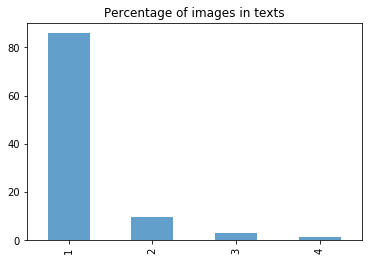

In [833]:
# Percentage of images in texts.
count_images_n = df['images_n'].value_counts()
count_images_n = count_images_n / df['images_n'].value_counts().sum() * 100
count_images_n.plot(kind='bar', alpha=0.7,title='Percentage of images in texts')

More than 85% of tweets contain only one image. Less than 10% contain two images and less than 5% contain three and four images.

#### Are dogs better identified with more images?

In [319]:
# See if there are rows that match there is no dog in the images
# in all their respective predictions.
false_p1_dog = df[df['is_a_dog_1'] == False]
false_p2_dog = df[df['is_a_dog_2'] == False]
false_p3_dog = df[df['is_a_dog_3'] == False]

# Rows that have all predictions predicted there is no dog in the image. 
from functools import reduce
false_predictions = [false_p1_dog, false_p2_dog['tweet_id'], false_p3_dog['tweet_id']]
total_false_predictions = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), false_predictions)
total_false_predictions

,tweet_id,date,time,text,name,rating_numerator,rating_denominator,dog_stage,expanded_urls,source,...,images_n,top_breed_pred,prob_1st_pred,is_a_dog_1,2nd_breed_pred,prob_2nd_pred,is_a_dog_2,3rd_breed_pred,prob_3rd_pred,is_a_dog_3
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13,10,None,https://twitter.com/dog_rates/status/892420643555336193/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,887517139158093824,2017-07-19,03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,14,10,None,https://twitter.com/dog_rates/status/887517139158093824/video/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2,886680336477933568,2017-07-16,20:14:00,This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,Derek,13,10,None,https://twitter.com/dog_rates/status/886680336477933568/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
3,881268444196462592,2017-07-01,21:49:04,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,Elliot,12,10,None,https://twitter.com/dog_rates/status/881268444196462592/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
4,880935762899988482,2017-06-30,23:47:07,This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,Louis,13,10,None,https://twitter.com/dog_rates/status/880935762899988482/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,666362758909284353,2015-11-16,21:10:36,Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,None,6,10,None,https://twitter.com/dog_rates/status/666362758909284353/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
303,666293911632134144,2015-11-16,16:37:02,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,None,3,10,None,https://twitter.com/dog_rates/status/666293911632134144/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
304,666268910803644416,2015-11-16,14:57:41,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,None,10,10,None,https://twitter.com/dog_rates/status/666268910803644416/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
305,666104133288665088,2015-11-16,04:02:55,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None,1,10,None,https://twitter.com/dog_rates/status/666104133288665088/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,hen,0.965932,False,cock,0

Text(0, 0.5, 'Percentage')

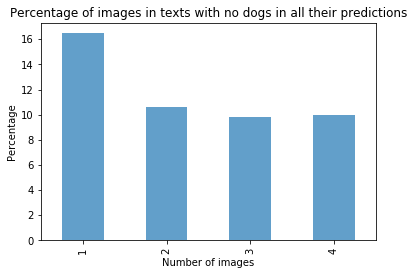

In [843]:
# Percentage of images in texts with no dogs in all their predictions.
per_total_false_predictions = total_false_predictions['images_n'].value_counts()/df['images_n'].value_counts() * 100
per_total_false_predictions.plot(kind='bar',alpha=0.7, title='Percentage of images in texts with no dogs in all their predictions')
plt.xlabel('Number of images')
plt.ylabel('Percentage')

In [838]:
# See if there are rows that match there is a dog in the images
# in all their respective predictions.
true_p1_dog = df[df['is_a_dog_1'] == True]
true_p2_dog = df[df['is_a_dog_2'] == True]
true_p3_dog = df[df['is_a_dog_3'] == True]

# Rows that have all predictions predicted there is a dog in the image. 
true_predictions = [true_p1_dog, true_p2_dog['tweet_id'], true_p3_dog['tweet_id']]
total_true_predictions = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), true_predictions)

Text(0, 0.5, 'Percentage')

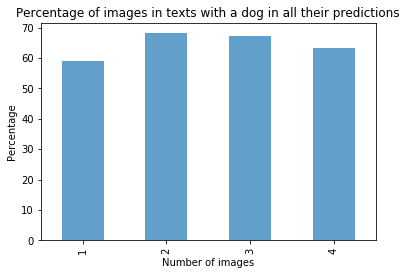

In [842]:
# Percentage of images in texts with a dog in all their predictions.
per_total_true_predictions = total_true_predictions['images_n'].value_counts()/df['images_n'].value_counts() * 100
per_total_true_predictions.plot(kind='bar',alpha=0.7, title='Percentage of images in texts with a dog in all their predictions')
plt.xlabel('Number of images')
plt.ylabel('Percentage')

The number of images is not related with a better identification of dogs whether predictions are false or true.

#### The first prediction is the one that more dogs predicts in the images?

In [322]:
# Count of there is a dog in the image in the top prediction.
df['is_a_dog_1'].value_counts()

True     1453
False    514 
Name: is_a_dog_1, dtype: int64

In [323]:
# Count of there is a dog in the image in the second prediction.
df['is_a_dog_2'].value_counts()

True     1470
False    497 
Name: is_a_dog_2, dtype: int64

In [324]:
# Count of there is a dog in the image in the second prediction.
df['is_a_dog_3'].value_counts()

True     1424
False    543 
Name: is_a_dog_3, dtype: int64

Text(0, 0.5, 'Count dogs identified')

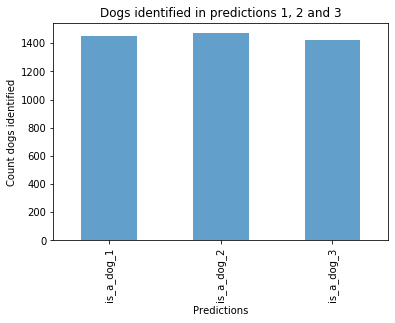

In [892]:
# Count of dogs identified in predictions 1,2 and 3.
count_dogs_identified_in_img = df[['is_a_dog_1','is_a_dog_2','is_a_dog_3']].sum()
count_dogs_identified_in_img.plot(kind='bar', alpha=0.7, title='Dogs identified in predictions 1, 2 and 3')
plt.xlabel('Predictions')
plt.ylabel('Count dogs identified')

All three predictions have a similar number of dogs identified. Whether or not to identify a dog is not a differentiator between predictions.

#### Is there a correlation between dog recognition and number of images per tweet?

Text(0, 0.5, 'Dog recognition Percentages')

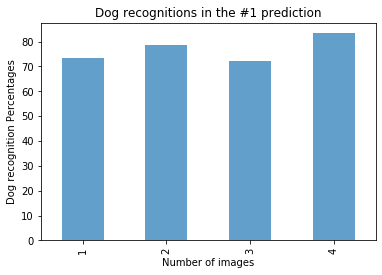

In [885]:
# Dogs recognised in #1 prediction.
count_dog_recognition_in_1prediction = df[df['is_a_dog_1'] == True]['images_n'].value_counts()
# Percentage of dogs recognised in #1 prediction.
per_dog_recognition_in_1prediction_accordingto_images_n = count_dog_recognition_in_1prediction / df.images_n.value_counts() * 100
per_dog_recognition_in_1prediction_accordingto_images_n.plot(kind='bar', alpha=0.7, title='Dog recognitions in the #1 prediction')
plt.xlabel('Number of images')
plt.ylabel('Dog recognition Percentages')

Text(0, 0.5, 'No dog recognised Percentages')

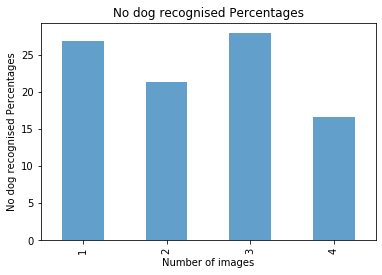

In [884]:
# Percentage of No dogs recognised in #1 prediction.
count_no_dog_recognition_in_1prediction = df[df['is_a_dog_1'] == False]['images_n'].value_counts()
per_no_dog_recognition_in_1prediction_accordingto_images_n = count_no_dog_recognition_in_1prediction / df.images_n.value_counts() * 100
per_no_dog_recognition_in_1prediction_accordingto_images_n.plot(kind='bar', alpha=0.7, title='No dog recognised Percentages')
plt.xlabel('Number of images')
plt.ylabel('No dog recognised Percentages')

There is no correlation between number of images and recognition of dogs.
However, the maximum number of images contains the highest percentage of detections of dogs, although it contains the lowest percentage for non-detection of dogs.

#### Is the neural network reliable?

In [847]:
total_false_predictions.sample(3)

,tweet_id,date,time,text,name,rating_numerator,rating_denominator,dog_stage,expanded_urls,source,...,images_n,top_breed_pred,prob_1st_pred,is_a_dog_1,2nd_breed_pred,prob_2nd_pred,is_a_dog_2,3rd_breed_pred,prob_3rd_pred,is_a_dog_3
247,670727704916926465,2015-11-28,22:15:21,This is Jeffrie. He's a handheld pup. Excellent ears. Super fluffy. 10/10 overall topnotch canine https://t.co/SWnrQAFOtt,Jeffrie,10,10,None,https://twitter.com/dog_rates/status/670727704916926465/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
157,684122891630342144,2016-01-04,21:23:02,Heartwarming scene of two pups that want nothing more than to be together. Touching af. Great tongue. Both 11/10 https://t.co/k32mSlRx0j,None,11,10,None,https://twitter.com/dog_rates/status/684122891630342144/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,cheetah,0.822193,False,Arabian_camel,0.046976,False,jaguar,0.025785,False
42,800459316964663297,2016-11-20,22:02:27,Here's a very sleepy pupper. Appears to be portable as h*ck. 12/10 would snug intensely https://t.co/61sX7pW5Ca,None,12,10,pupper,https://twitter.com/dog_rates/status/800459316964663297/photo/1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False


In [848]:
# Percentage of total_total_false_predictions.
perc_total_false_predictions = total_false_predictions.shape[0] / df.shape[0] * 100
round(perc_total_false_predictions,2)

15.61

It is strange to think that **15.61% of the images predict there is no dog in the image in any of their predictions** when it is a Dog Rates twitter account. 
The neural network makes mistakes predicting whether or not there are dogs.

In [849]:
# Percentage of total_total_true_predictions.
perc_total_true_predictions = total_true_predictions.shape[0] / df.shape[0] *100
perc_total_true_predictions

60.09150991357397

In [422]:
# Percentage of dogs identified per image through #1 prediction.
perc_true_p1_dog = true_p1_dog.shape[0] / df.shape[0] * 100
perc_true_p1_dog

73.86883579054397

**Just 60% of tweet_ids indicate that the neural networks says all predictions predict a dog in their images.**
Again, it is a low percentage for a Dog Rate twitter account.
Although, if we look at the predictions of the first algorithm the percentage goes up to 73.87%.

#### What is the most repeated breed in those identified as dogs in predictions?

Text(0, 0.5, 'Breeds')

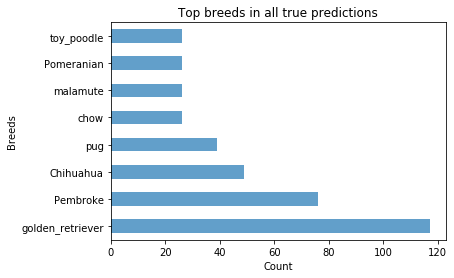

In [852]:
# Top breed in all true predictions.
total_true_predictions_count = total_true_predictions.top_breed_pred.value_counts()
total_true_predictions_count_top = total_true_predictions_count[[0,1,3,4,5,6,7,8]]
total_true_predictions_count_top.plot(kind='barh', alpha=0.7, title='Top breeds in all true predictions')
plt.xlabel('Count')
plt.ylabel('Breeds')

Text(0, 0.5, 'Breeds')

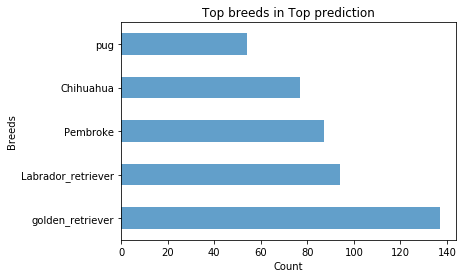

In [853]:
# Top breed in first prediction.
true_p1_dog.top_breed_pred.value_counts()[[0,1,2,3,4]].plot(kind='barh', alpha=0.7, title='Top breeds in Top prediction')
plt.xlabel('Count')
plt.ylabel('Breeds')

Text(0, 0.5, 'Breeds')

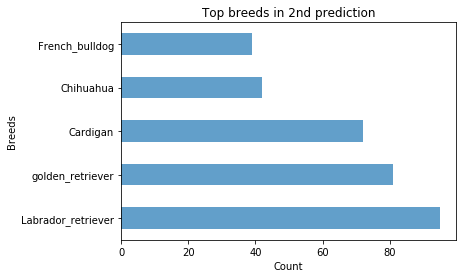

In [859]:
# Top breed in second prediction.
true_p2_dog['2nd_breed_pred'].value_counts()[[0,1,2,3,4]].plot(kind='barh', alpha=0.7, title='Top breeds in 2nd prediction')
plt.xlabel('Count')
plt.ylabel('Breeds')

Text(0, 0.5, 'Breeds')

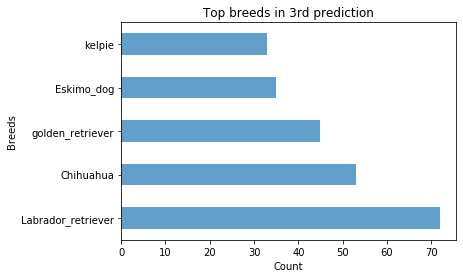

In [860]:
# Top breed in third prediction.
true_p3_dog['3rd_breed_pred'].value_counts()[[0,1,2,3,4]].plot(kind='barh', alpha=0.7, title='Top breeds in 3rd prediction')
plt.xlabel('Count')
plt.ylabel('Breeds')

The most common breeds differ for the three predictions despite having a similar number of dogs identified in the images.
**The breeds in which the three predictions coincide**, although not in quantities, **are: Labrador retriever, Chihuahua and Golden retriever.**

#### What kinds of things has the neural network identified in the false predictions?

Text(0, 0.5, 'Things identified')

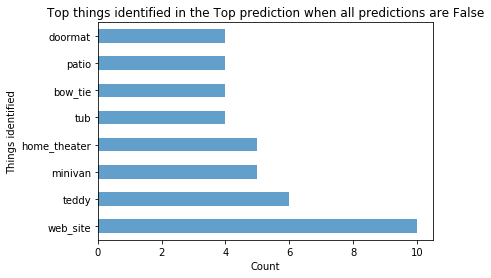

In [861]:
# Top things identified in the Top prediction when all predictions are False.
total_false_predictions_count = total_false_predictions.top_breed_pred.value_counts()
total_false_predictions_count_top = total_false_predictions_count[[0,1,3,4,5,6,7,8]]
total_false_predictions_count_top.plot(kind='barh', alpha=0.7, title='Top things identified in the Top prediction when all predictions are False')
plt.xlabel('Count')
plt.ylabel('Things identified')

Most of the identified things, except teddy, seem to be part of common image scenarios.
**The neural network has probably not recognized the protagonist element, in this case the dog.**

#### Are the most predicted breeds the most liked?

Text(0, 0.5, 'Breeds #1 predictions')

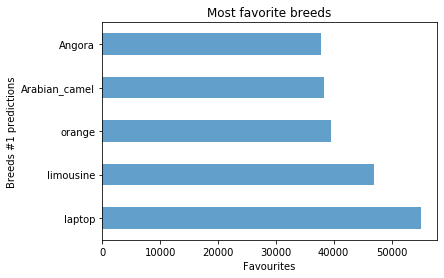

In [878]:
# Top breed #1 predictions and favorites.
top_breed_pred_mostfav = df.groupby('top_breed_pred').favorite_count.mean().nlargest()
top_breed_pred_mostfav.plot(kind='barh', alpha=0.7, title='Most favorite breeds')
plt.xlabel('Favourites')
plt.ylabel('Breeds #1 predictions')

The most predicted breeds don't corresponde to any of breeds with more favorites. But it's more, these breeds are not breeds. 

In [877]:
# Check images of laptop breed.
df[df['top_breed_pred'] == 'laptop'][['tweet_id','top_breed_pred','favorite_count','text','expanded_urls']]

,tweet_id,top_breed_pred,favorite_count,text,expanded_urls
100,868880397819494401,laptop,55098,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,https://twitter.com/dog_rates/status/868880397819494401/photo/1


Although they are not breeds, there are dogs in most of their images.
Users prefer photos of dogs in fun scenarios, where the neural network cannot correctly identify whether or not there is a dog, to photos where the main figure is the dog.

#### Are the most predicted breeds the most retweeted?

Text(0, 0.5, 'Breeds #1 predictions')

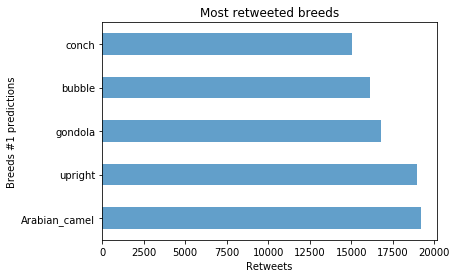

In [879]:
# Most retweeted breeds.
top_breed_pred_mostrt = df.groupby('top_breed_pred').retweet_count.mean().nlargest()
top_breed_pred_mostrt.plot(kind='barh', alpha=0.7, title='Most retweeted breeds')
plt.xlabel('Retweets')
plt.ylabel('Breeds #1 predictions')

In [881]:
# Check images of upright breed.
df[df['top_breed_pred'] == 'upright'][['tweet_id','top_breed_pred','favorite_count','text','expanded_urls']]

,tweet_id,top_breed_pred,favorite_count,text,expanded_urls
1500,675354435921575936,upright,35178,Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,https://twitter.com/dog_rates/status/675354435921575936/video/1


The same occurs in retweets as in favorites. The most retweeted groups of breeds are not breeds but dogs still appear in the images.

#### Is there a famous dog that has a good rating?

In [883]:
# Top 10 names
topnames = df['name'].value_counts()
topnames.nlargest(13)

None       535
Charlie    11 
Cooper     10 
Lucy       10 
Oliver     10 
Tucker     9  
Penny      9  
Winston    8  
Sadie      8  
the        7  
Daisy      7  
Toby       7  
Lola       7  
Name: name, dtype: int64

In [650]:
# The top 10 names with the highest rating mean.
df['ratio'] = df['rating_numerator'] / df['rating_denominator']
df.groupby('name').ratio.mean().nlargest(10)

name
Atticus     89.350000
Logan       7.500000 
Sam         2.214286 
Sophie      1.500000 
Cermet      1.400000 
Clifford    1.400000 
Doobert     1.400000 
Emmy        1.400000 
General     1.400000 
Iggy        1.400000 
Name: ratio, dtype: float64

In [802]:
df['ratio'].describe()

count    1967.000000
mean     1.173477   
std      4.094640   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: ratio, dtype: float64

In [652]:
# Remove rating outliers
df_rating_no_outliers = df[df['ratio']<3]
df_rating_no_outliers.groupby('name').ratio.mean().nlargest(10)

name
Sophie      1.5
Cermet      1.4
Clifford    1.4
Doobert     1.4
Emmy        1.4
General     1.4
Iggy        1.4
Kuyu        1.4
Laika       1.4
Smiley      1.4
Name: ratio, dtype: float64

The dog's name does not correlate with the rating. 
Named tweet_ids are much better rated than unnamed tweet_ids. 
**There is no dog that is, a priori, the most famous of the account and it is good rated.**

#### Do younger dogs get more favorites? Do the older ones receive fewer retweets?

In [796]:
# Favorite, Retweet and Rating means by Dog Stages dictionaries.
dog_stage_fav = df.groupby('dog_stage').favorite_count.mean().nlargest(8).to_dict()
dog_stage_rt = df.groupby('dog_stage').retweet_count.mean().nlargest(8).to_dict()
dog_stage_rat = df.groupby('dog_stage').ratio.mean().nlargest(8).to_dict()

(<matplotlib.axes._subplots.AxesSubplot at 0x132f435d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x132eecbd0>)

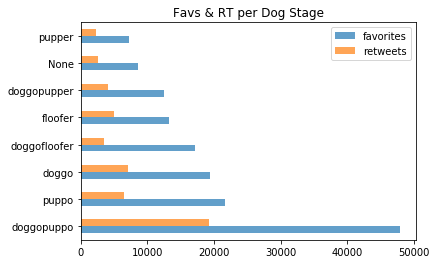

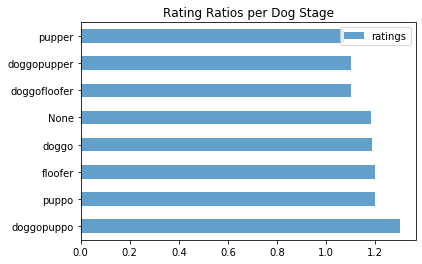

In [803]:
# Plot Favorite and Retweet means by Dog Stages and Ratings by Dog Stages.
rt_fav_dog_stages_df = pd.DataFrame({'favorites': dog_stage_fav, 'retweets': dog_stage_rt})
rat_dog_stages_df = pd.DataFrame({'ratings': dog_stage_rat}).nlargest(columns='ratings',n=8)
rt_fav_dog_stages_df.plot(kind='barh',alpha=0.7,title='Favs & RT per Dog Stage'), rat_dog_stages_df.plot(kind='barh', alpha=0.7,title='Rating Ratios per Dog Stage')

**Doggo and puppo (doggopuppo) dog stage is the most appreciated** with the highest ratings, retweets and favorites, while Pupper is the least appreciated.
Doggo and puppo dog stage generates the most interactions and ratings in DogRates twitter account.

#### Better ratings have more rt and favs?

Text(0, 0.5, 'Favorite counts')

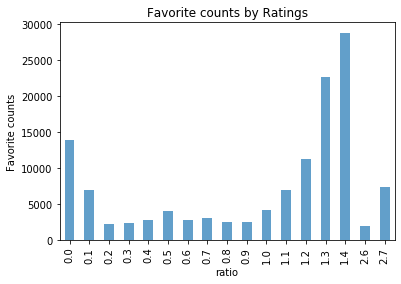

In [829]:
# Favorite Counts by Ratings with no outliers.
df_rating_no_outliers.groupby('ratio').favorite_count.mean().plot(kind='bar',alpha=0.7,title='Favorite counts by Ratings')
plt.ylabel('Favorite counts')

Text(0, 0.5, 'Retweet counts')

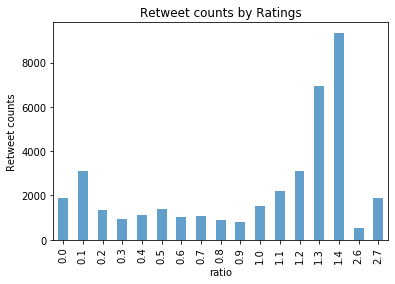

In [828]:
# Retweet Counts by Ratings with no outliers.
df_rating_no_outliers.groupby('ratio').retweet_count.mean().plot(kind='bar',alpha=0.7,title='Retweet counts by Ratings')
plt.ylabel('Retweet counts')

**Having a higher rating does not imply having more favorites or retweets.** This only occurs for ratios between 0.9 and 1.4.